# Capstone Project: Credit Default Risk
## Heber Jenson (Target Variable, Missing Data, Code Compilation)
## Hasitha Josyula (Correlation)
## Sai Nerusu(Dataset Aggregation and Joins)
## Pankhuri (Outliers)

### Table of contents:
- Business Problem
- EDA
- Load Data
- Target Variable
- Missing Values
- Joining Datasets
- Data Cleaning
- Outliers
- Correlation
- Categorical Variables

# Business Problem
Home Credit is a banking and lending service provider striving to offer financial services to customers with little or no credit history. Their goal is to provide loans to their clients, who will most likely repay them. Through machine learning and data analysis, they want to maximize their ability to identify customers who can pay their loan payments on time. Home Credit desires to maximize the number of loans to customers capable of repayment, as it will boost the company's financial returns. This notebook will walk through the sets used to address this business problem.
# EDA
EDA, or exploratory data analysis, is the first step in creating a solution to the Home Credits problem. We first need to explore the data that has been provided and determine what it contains, address any potential errors or missing values, and determine what variables may be the most important to determine if someone can pay back their loans.

## Load Data

In [3]:
# Package Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')

### Data
The data for this project includes a total of 8 different datasets. The application train and test sets are the primary datasets for this project. Data contained in these datasets is information that potential customers will include in their application for a loan. The train set should be used for model development. The test set should be used for final submission and model comparison based on Kaggle's results. Other datasets are linked to one another based on specific primary keys. The bureau data sets contain information about customers with previous loans reported to the credit bureaus. Credit card balance data is available for any client with a credit card loan through Home Credit. Installments and Cash balance data contain information about the client’s previous loans with Home Credit.

Due to the size of the datasets we will not be able to explore all the variables or data sets.

In [7]:
# Import test and trian data
app_test = pd.read_csv("/Users/u1427750/Desktop/EDA/application_test.csv")
app_train = pd.read_csv("/Users/u1427750/Desktop/EDA/application_train.csv")
bureau = pd.read_csv("/Users/u1427750/Desktop/EDA/bureau.csv")
# bureau_bal = pd.read_csv(r'home-credit-default-risk/bureau_balance.csv')
# cc_bal = pd.read_csv(r'home-credit-default-risk/credit_card_balance.csv')
# inst_pymt = pd.read_csv(r'home-credit-default-risk/installments_payments.csv')
# pos_bal = pd.read_csv(r'home-credit-default-risk/POS_CASH_balance.csv')
prv_app = pd.read_csv("/Users/u1427750/Desktop/EDA/previous_application.csv")
smpl_sub = pd.read_csv("/Users/u1427750/Desktop/EDA/sample_submission.csv") 

In [8]:
print(app_test.shape)
app_train.shape

(48744, 121)


(307511, 122)

## Target Variable
### Target Variable Questions: 
What is the target variable?, Is it categorical or numeric?, If categorical, what is the balance within the dataset?

In [9]:
# Show training data target response totals
app_train['TARGET'].value_counts() # Only 8% of the training data has a target value of 1

0    282686
1     24825
Name: TARGET, dtype: int64

In [10]:
MajorityClass_sub = smpl_sub.copy()
MajorityClass_sub.iloc[:,1] = 1

print(MajorityClass_sub.head())
MajorityClass_sub.to_csv("Majority_sub.csv", index = False, header = True)

   SK_ID_CURR  TARGET
0      100001       1
1      100005       1
2      100013       1
3      100028       1
4      100038       1


### Target Value Results

The target variable for this project is categorical in nature. This means the target variable will only take a select set of values. In this case, the target variable is binary, where 1 indicates a high risk of default, and 0 indicates a low risk of default. The target variable is also imbalanced, with only 8% of the observations defaulting on their loans.  It is to be expected as financial institutions would not stay in business if a large portion of their customers were not repaying their loans. When training the model, we may want to include Oversampling techniques to improve model performance. When we created a model that used the majority class as our predictor for the baseline, we obtained an accuracy score from Kaggle of 0.5. Future model performance can be compared with this value.

## Missing Values
### Missing Values Questions:
How many of the variables in the datasets have missing values?, At what point should we drop a variable if it is missing too many values?, What should we do with missing data rows?

In [11]:
def percentage_na_values_table(df):
    # Sum of NA values in df
    na_val = df.isna().sum()
    
    # Percentage of NA values
    na_val_perc = 100 * na_val / len(df)
    
    # Create Table
    na_col_table = pd.concat([na_val, na_val_perc], axis = 1)
    
    # Sort by %NA descending
    na_col_table = na_col_table[
        na_col_table.iloc[:,1] != 0].sort_values(1, ascending = False).round(1) 
    
    # Add column names
    na_col_table = na_col_table.rename(columns = {0: 'Total NA\'s in Column', 1: "Percentage NA"})
    
    print("DF has " + str(df.shape[1]) + " columns.\nThere are " + str(na_col_table.shape[0]) + " columns that have missing values.")
    
    # Return Table
    return na_col_table
    

In [7]:
percentage_na_values_table(app_train).tail(30)

DF has 122 columns.
There are 67 columns that have missing values.


,Total NA's in Column,Percentage NA
LIVINGAREA_MEDI,154350,50.2
LIVINGAREA_MODE,154350,50.2
LIVINGAREA_AVG,154350,50.2
HOUSETYPE_MODE,154297,50.2
FLOORSMAX_MEDI,153020,49.8
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8


Wow, over half of the variables in the data have over 50% Null values. This is a major issue, lets see what the other datasets look like.

In [12]:
percentage_na_values_table(app_test).tail(25)

DF has 121 columns.
There are 64 columns that have missing values.


,Total NA's in Column,Percentage NA
LIVINGAREA_MODE,23552,48.3
FLOORSMAX_MEDI,23321,47.8
FLOORSMAX_MODE,23321,47.8
FLOORSMAX_AVG,23321,47.8
YEARS_BEGINEXPLUATATION_MEDI,22856,46.9
YEARS_BEGINEXPLUATATION_MODE,22856,46.9
YEARS_BEGINEXPLUATATION_AVG,22856,46.9
TOTALAREA_MODE,22624,46.4
EMERGENCYSTATE_MODE,22209,45.6
EXT_SOURCE_1,20532,42.1


In [13]:
percentage_na_values_table(bureau).tail(10)

DF has 17 columns.
There are 7 columns that have missing values.


,Total NA's in Column,Percentage NA
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [15]:
percentage_na_values_table(prv_app).tail(20)

DF has 37 columns.
There are 16 columns that have missing values.


,Total NA's in Column,Percentage NA
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


### Missing values
There are a lot of missing values in many of the columns in the application datasets. We need to try and determine what variables are worth keeping and what is not. We can now look at missing data in the other datasets. This could be useful to determine what datasets to add to the application data.

The previous application dataset has a lot of missing values. Both Rate_Interest_Primary and Rate_Interest_Privileged are missing almost all the data. Why would Health Equity track these variables if all the data is missing?

In [11]:
# percentage_na_values_table(bureau_bal).tail()

In [12]:
# percentage_na_values_table(cc_bal).tail(10)

In [13]:
# percentage_na_values_table(inst_pymt).tail()

In [14]:
# percentage_na_values_table(pos_bal).tail()

## Joining Datasets
For furthure analysis it would be smart to join the datasets together to get a better picture of the data. The different data sets have different levels of granularity. We will need to address that when we get to the datasets we want to combined.

In [16]:
app_test.shape

(48744, 121)

In [17]:
# With combining tables, we first want to combine the application data. This allows us to maintain the same number of columns when we seperate them later.
data_j = app_test.append(app_train, ignore_index = True, verify_integrity = True)
data_j.shape

(356255, 122)

### Bureau Dataset
We wanted to first look into the bureau dataset as it is directly related to the application datasets base on the SK_ID_CURR varaible.

In [18]:
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


It looks like the bureau data has multiple rows for individual applicants. This would be a problem to try and join the bureau data to the application data. Instead we can create a smaller table with variables that match the granularity of the application data.

In [19]:
num_loans = bureau.groupby('SK_ID_CURR', as_index = False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'NUM_PREV_LOANS'})
num_loans.head()

,SK_ID_CURR,NUM_PREV_LOANS
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [20]:
bureau['NUM_ACTIVE_ACNT'] = np.where(bureau['CREDIT_ACTIVE'] == 'Closed', 0, 1)
num_actv_lns = bureau.groupby('SK_ID_CURR', as_index = False)['NUM_ACTIVE_ACNT'].sum()
num_actv_lns.head()

,SK_ID_CURR,NUM_ACTIVE_ACNT
0,100001,3
1,100002,2
2,100003,1
3,100004,0
4,100005,2


In [21]:
AMT_CREDIT_T = bureau.groupby('SK_ID_CURR', as_index = False)['AMT_CREDIT_SUM'].sum().round(2).rename(columns = {'AMT_CREDIT_SUM': 'TOTAL_CREDIT_AMT_PREV'})
AMT_CREDIT_T.head()

,SK_ID_CURR,TOTAL_CREDIT_AMT_PREV
0,100001,1453365.00
1,100002,865055.56
2,100003,1017400.50
3,100004,189037.80
4,100005,657126.00


In [22]:
# This function will change the numeric variables granularity to match the granularity of the application data. 
# We need to be sure that the columns this is used on are continuous and not categorical.

def agg_numeric_categorical(df, group_var, df_name):
    for xcol in df:
        if xcol != group_var and 'SK_ID' in xcol:
            df = df.drop(columns=xcol)            
    grp_id = df[group_var]
    numeric_df = df.select_dtypes(include='number')
#     categorical_df = df.select_dtypes(include='object')
#     categorical_df[group_var] = grp_id
    numeric_agg = numeric_df.groupby(group_var).agg(['count', 'sum']).reset_index() # Grouping and performing aggregations could use ['count', 'sum', 'max', 'min', 'mean']
#     categorical_agg = categorical_df.groupby(group_var).agg(lambda x: x.value_counts().index[0]).reset_index()
    numeric_agg.columns = [group_var] + [f'{df_name}_{col[0]}_{col[1]}' for col in numeric_agg.columns[1:]]
#     categorical_agg.columns = [group_var] + [f'{df_name}_{col[0]}' for col in categorical_agg.columns[1:]]
#     agg = numeric_agg.merge(categorical_agg, on=group_var, how='left')
    return numeric_agg

In [23]:
bureau_agg = agg_numeric_categorical(bureau, 'SK_ID_CURR', 'data_bureau')

bureau_agg.head()

,SK_ID_CURR,data_bureau_DAYS_CREDIT_count,data_bureau_DAYS_CREDIT_sum,data_bureau_CREDIT_DAY_OVERDUE_count,data_bureau_CREDIT_DAY_OVERDUE_sum,data_bureau_DAYS_CREDIT_ENDDATE_count,data_bureau_DAYS_CREDIT_ENDDATE_sum,data_bureau_DAYS_ENDDATE_FACT_count,data_bureau_DAYS_ENDDATE_FACT_sum,data_bureau_AMT_CREDIT_MAX_OVERDUE_count,...,data_bureau_AMT_CREDIT_SUM_LIMIT_count,data_bureau_AMT_CREDIT_SUM_LIMIT_sum,data_bureau_AMT_CREDIT_SUM_OVERDUE_count,data_bureau_AMT_CREDIT_SUM_OVERDUE_sum,data_bureau_DAYS_CREDIT_UPDATE_count,data_bureau_DAYS_CREDIT_UPDATE_sum,data_bureau_AMT_ANNUITY_count,data_bureau_AMT_ANNUITY_sum,data_bureau_NUM_ACTIVE_ACNT_count,data_bureau_NUM_ACTIVE_ACNT_sum
0,100001,7,-5145,7,0,7,577.0,4,-3302.0,0,...,6,0.000,7,0.0,7,-652,7,24817.5,7,3
1,100002,8,-6992,8,0,6,-2094.0,6,-4185.0,5,...,4,31988.565,8,0.0,8,-3999,7,0.0,8,2
2,100003,4,-5603,4,0,4,-2178.0,3,-3292.0,4,...,4,810000.000,4,0.0,4,-3264,0,0.0,4,1
3,100004,2,-1734,2,0,2,-977.0,2,-1065.0,1,...,2,0.000,2,0.0,2,-1064,0,0.0,2,0
4,100005,3,-572,3,0,3,1318.0,1,-123.0,1,...,3,0.000,3,0.0,3,-163,3,4261.5,3,2


### Previous Application Dataset
Lets quickly view the application dataset.

In [24]:
print(prv_app.shape)

print(prv_app['SK_ID_CURR'].nunique())
prv_app.head()

(1670214, 37)
338857


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
num_prev_apps = prv_app.groupby('SK_ID_CURR', as_index = False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'NUM_PREV_APPS'})
num_prev_apps.head()

,SK_ID_CURR,NUM_PREV_APPS
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [26]:
prv_app.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [27]:
prv_app_numeric = prv_app.select_dtypes(exclude = np.object)

prv_app_num = prv_app_numeric.copy()
for i in prv_app_numeric.columns:
    if prv_app_numeric[i].nunique(1) == 2:
        prv_app_num.drop(i, inplace = True, axis = 1)
prv_app_num.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,0.0,0.182832,0.867336,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,NaN,NaN,NaN,-164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,NaN,NaN,NaN,-301,-1,12.0,365243.0,-271.0,59.0,365243.0,365243.0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,NaN,NaN,NaN,-512,-1,12.0,365243.0,-482.0,-152.0,-182.0,-177.0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,NaN,NaN,NaN,-781,-1,24.0,NaN,NaN,NaN,NaN,NaN


In [28]:
prv_app_agg = agg_numeric_categorical(prv_app_num, 'SK_ID_CURR', 'prv_app')
prv_app_agg

,SK_ID_CURR,prv_app_AMT_ANNUITY_count,prv_app_AMT_ANNUITY_sum,prv_app_AMT_APPLICATION_count,prv_app_AMT_APPLICATION_sum,prv_app_AMT_CREDIT_count,prv_app_AMT_CREDIT_sum,prv_app_AMT_DOWN_PAYMENT_count,prv_app_AMT_DOWN_PAYMENT_sum,prv_app_AMT_GOODS_PRICE_count,...,prv_app_DAYS_FIRST_DRAWING_count,prv_app_DAYS_FIRST_DRAWING_sum,prv_app_DAYS_FIRST_DUE_count,prv_app_DAYS_FIRST_DUE_sum,prv_app_DAYS_LAST_DUE_1ST_VERSION_count,prv_app_DAYS_LAST_DUE_1ST_VERSION_sum,prv_app_DAYS_LAST_DUE_count,prv_app_DAYS_LAST_DUE_sum,prv_app_DAYS_TERMINATION_count,prv_app_DAYS_TERMINATION_sum
0,100001,1,3951.000,1,24835.5,1,23787.0,1,2520.0,1,...,1,365243.0,1,-1709.0,1,-1499.0,1,-1619.0,1,-1612.0
1,100002,1,9251.775,1,179055.0,1,179055.0,1,0.0,1,...,1,365243.0,1,-565.0,1,125.0,1,-25.0,1,-17.0
2,100003,3,169661.970,3,1306309.5,3,1452573.0,2,6885.0,3,...,3,1095729.0,3,-3823.0,3,-3013.0,3,-3163.0,3,-3142.0
3,100004,1,5357.250,1,24282.0,1,20106.0,1,4860.0,1,...,1,365243.0,1,-784.0,1,-694.0,1,-724.0,1,-714.0
4,100005,1,4813.200,2,44617.5,2,40153.5,1,4464.0,1,...,1,365243.0,1,-706.0,1,-376.0,1,-466.0,1,-460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,1,6605.910,1,40455.0,1,40455.0,1,0.0,1,...,1,365243.0,1,-210.0,1,0.0,1,-30.0,1,-25.0
338853,456252,1,10074.465,1,57595.5,1,56821.5,1,3456.0,1,...,1,365243.0,1,-2466.0,1,-2316.0,1,-2316.0,1,-2311.0
338854,456253,2,9540.810,2,48325.5,2,41251.5,2,8806.5,2,...,2,730486.0,2,-4678.0,2,-4438.0,2,-4438.0,2,-4425.0
338855,456254,2,21362.265,2,242635.5,2,268879.5,2,0.0,2,...,2,730486.0,2,-538.0,2,302.0,2,730486.0,2,730486.0


### Joining New variables to Application dataset
Lets now add these new variables to the application dataset. Due to computational processing power, we are going to exclude the datasets bureau_agg and prv_app_agg.

In [29]:
data_j = data_j.merge(num_loans, on = 'SK_ID_CURR', how = 'left')
data_j = data_j.merge(num_actv_lns, on = 'SK_ID_CURR', how = 'left')
data_j = data_j.merge(AMT_CREDIT_T, on = 'SK_ID_CURR', how = 'left')
data_j = data_j.merge(num_prev_apps, on = 'SK_ID_CURR', how = 'left')
# data_j = data_j.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
# data_j = data_j.merge(prv_app_agg, on = 'SK_ID_CURR', how = 'left')

data_j.shape

(356255, 126)

In [30]:
data_j['NUM_PREV_LOANS'] = data_j['NUM_PREV_LOANS'].fillna(0)
data_j['NUM_ACTIVE_ACNT'] = data_j['NUM_ACTIVE_ACNT'].fillna(0)
data_j['TOTAL_CREDIT_AMT_PREV'] = data_j['TOTAL_CREDIT_AMT_PREV'].fillna(0)
data_j['NUM_PREV_APPS'] = data_j['NUM_PREV_APPS'].fillna(0)

# for i in bureau_agg.columns:
#     data_j[i] = data_j[i].fillna(0)
# for i in prv_app_agg.columns:
#     data_j[i] = data_j[i].fillna(0)


## Data Cleaning
### Data Cleaning Questions:
How should we deal with null values?, How many null values are still in the dataset

In [31]:
percentage_na_values_table(data_j).tail(30)

DF has 126 columns.
There are 68 columns that have missing values.


,Total NA's in Column,Percentage NA
LIVINGAREA_MEDI,177902,49.9
LIVINGAREA_MODE,177902,49.9
LIVINGAREA_AVG,177902,49.9
FLOORSMAX_MODE,176341,49.5
FLOORSMAX_AVG,176341,49.5
FLOORSMAX_MEDI,176341,49.5
YEARS_BEGINEXPLUATATION_MEDI,172863,48.5
YEARS_BEGINEXPLUATATION_AVG,172863,48.5
YEARS_BEGINEXPLUATATION_MODE,172863,48.5
TOTALAREA_MODE,171055,48.0


In [32]:
# We still have a large number of variables with high percentages of null values. Lets drop columns with null values. (The dataset is too large for my computer and needs to be shrunk.)
data_target = data_j[['SK_ID_CURR', 'TARGET']]
data = data_j.dropna(thresh = len(data_j['SK_ID_CURR']), axis = 1)
print(data.shape)

# We decreased from 186 variables to 118. That is still a lot of variables, especially once we dummitize the categorical variables.

(356255, 58)


In [34]:
data.dtypes.value_counts()
# We have at least 14 categorical vairbles contained within the data. We need to address this issue.

int64      40
object     10
float64     8
dtype: int64

## Data Distrubution & Outliers

### Remove categorical variables with extremely imbalanced responses.
(Threshold 8%)

In [35]:
data_numeric = data.select_dtypes(exclude = np.object)

data_num = data_numeric.copy() # DF for numeric variables
print(data_num.shape)
data_bin = [] # Stores column names for binary variables
for i in data_numeric.columns:
    if data_numeric[i].nunique(1) == 2:
        data_bin.append(i)
        data_num.drop(i, inplace = True, axis = 1)
data_num.shape

(356255, 48)


(356255, 16)

In [36]:
import re    
#docs = data[data.columns]
# for i in data.columns:
#     if re.search("FLAG_.", i):
#         docs.append(i)

for i in data_bin:
    if data[i].value_counts(dropna = True, normalize = True)[0] < 0.08 or data[i].value_counts(dropna = True, normalize = True)[1] < 0.08:
        data.drop(i, inplace = True, axis = 1)

data = data.merge(data_target, on = 'SK_ID_CURR', how = 'left')
data.shape

(356255, 35)

In [37]:
# We can look at the discriptive stats for all of the columns.
data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,NUM_PREV_LOANS,NUM_ACTIVE_ACNT,TOTAL_CREDIT_AMT_PREV,NUM_PREV_APPS,TARGET
count,356255.000000,356255.000000,3.562550e+05,3.562550e+05,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,...,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,3.562550e+05,356255.000000,307511.000000
mean,278128.000000,0.414316,1.701161e+05,5.877674e+05,0.020917,-16041.248841,64317.231413,-4983.593527,-3002.071163,0.818498,...,0.229661,0.178824,0.720504,0.087976,0.082346,4.817976,1.788480,1.710342e+06,4.688254,0.080729
std,102842.104413,0.720378,2.235068e+05,3.986237e+05,0.013915,4358.803980,141705.532576,3526.968986,1517.901735,0.385434,...,0.420616,0.383206,0.448752,0.283261,0.274891,4.547286,1.825496,3.921649e+06,4.251232,0.272419
min,100001.000000,0.000000,2.565000e+04,4.500000e+04,0.000253,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,189064.500000,0.000000,1.125000e+05,2.700000e+05,0.010006,-19676.000000,-2781.000000,-7477.000000,-4318.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.572869e+05,2.000000,0.000000
50%,278128.000000,0.000000,1.530000e+05,5.002110e+05,0.018850,-15755.000000,-1224.000000,-4502.000000,-3252.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,7.235955e+05,4.000000,0.000000
75%,367191.500000,1.000000,2.025000e+05,7.975575e+05,0.028663,-12425.000000,-290.000000,-1995.000000,-1717.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,3.000000,2.015381e+06,6.000000,0.000000
max,456255.000000,20.000000,1.170000e+08,4.050000e+06,0.072508,-7338.000000,365243.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,116.000000,32.000000,1.017958e+09,77.000000,1.000000


In [38]:
# Dataset is still too large for computations on my system. We will need to srink the dataset again.
data.shape

(356255, 35)

## Outliers
### Outlier Questions:
How should we address any found outliers?, How many variables have outliers?

### Example 1: Days Employed

In [39]:
# DAYS EMPLOYED
data['DAYS_EMPLOYED'].describe()

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

The max value of days_employed is more than 1000 years. This is definately an error in the data.

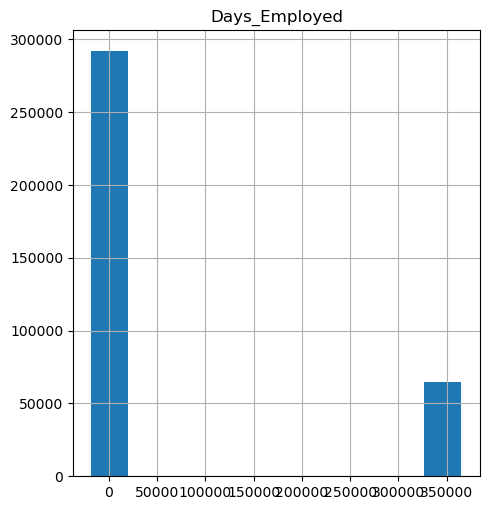

In [40]:
data['DAYS_EMPLOYED'].hist(figsize=(5, 5))
plt.tight_layout()
plt.title('Days_Employed')
plt.show()

You can see the outliers in the visual plot. It looks like we have a few observations with large values.

In [41]:
# Split data set up again.
percentage_na_values_table(data).tail(30)

DF has 35 columns.
There are 1 columns that have missing values.


,Total NA's in Column,Percentage NA
TARGET,48744,13.7


In [42]:
data_1 = data.copy()
data = data_1.loc[data_1['TARGET'].notna()].copy()
data_test = data_1.loc[data_1['TARGET'].isna()] 
print(data.shape)
data_test.shape

(307511, 35)


(48744, 35)

In [43]:
from scipy import stats

# Due to the size of the dataframe it would be impracticle to show a histogram for each of the varaibles and try to visually determine what variables that have outliers. 
# Instead we will use the Z-score function in the scipy package. The function will calculate a zscore for each value in the df. We will remove any zscores > 3 
data_numeric = data.select_dtypes(exclude = np.object)

data_num = data_numeric.copy() # DF for numeric variables
print(data_num.shape)
data_bin = [] # Stores column names for binary variables
for i in data_numeric.columns:
    if data_numeric[i].nunique(1) == 2:
        data_bin.append(i)
        data_num.drop(i, inplace = True, axis = 1)
data_num.shape

data = data[(np.abs(stats.zscore(data_num)) < 3).all(axis = 1)]

data.shape # We removed 29,128 row with outliers in the data.

(307511, 25)


(278329, 35)

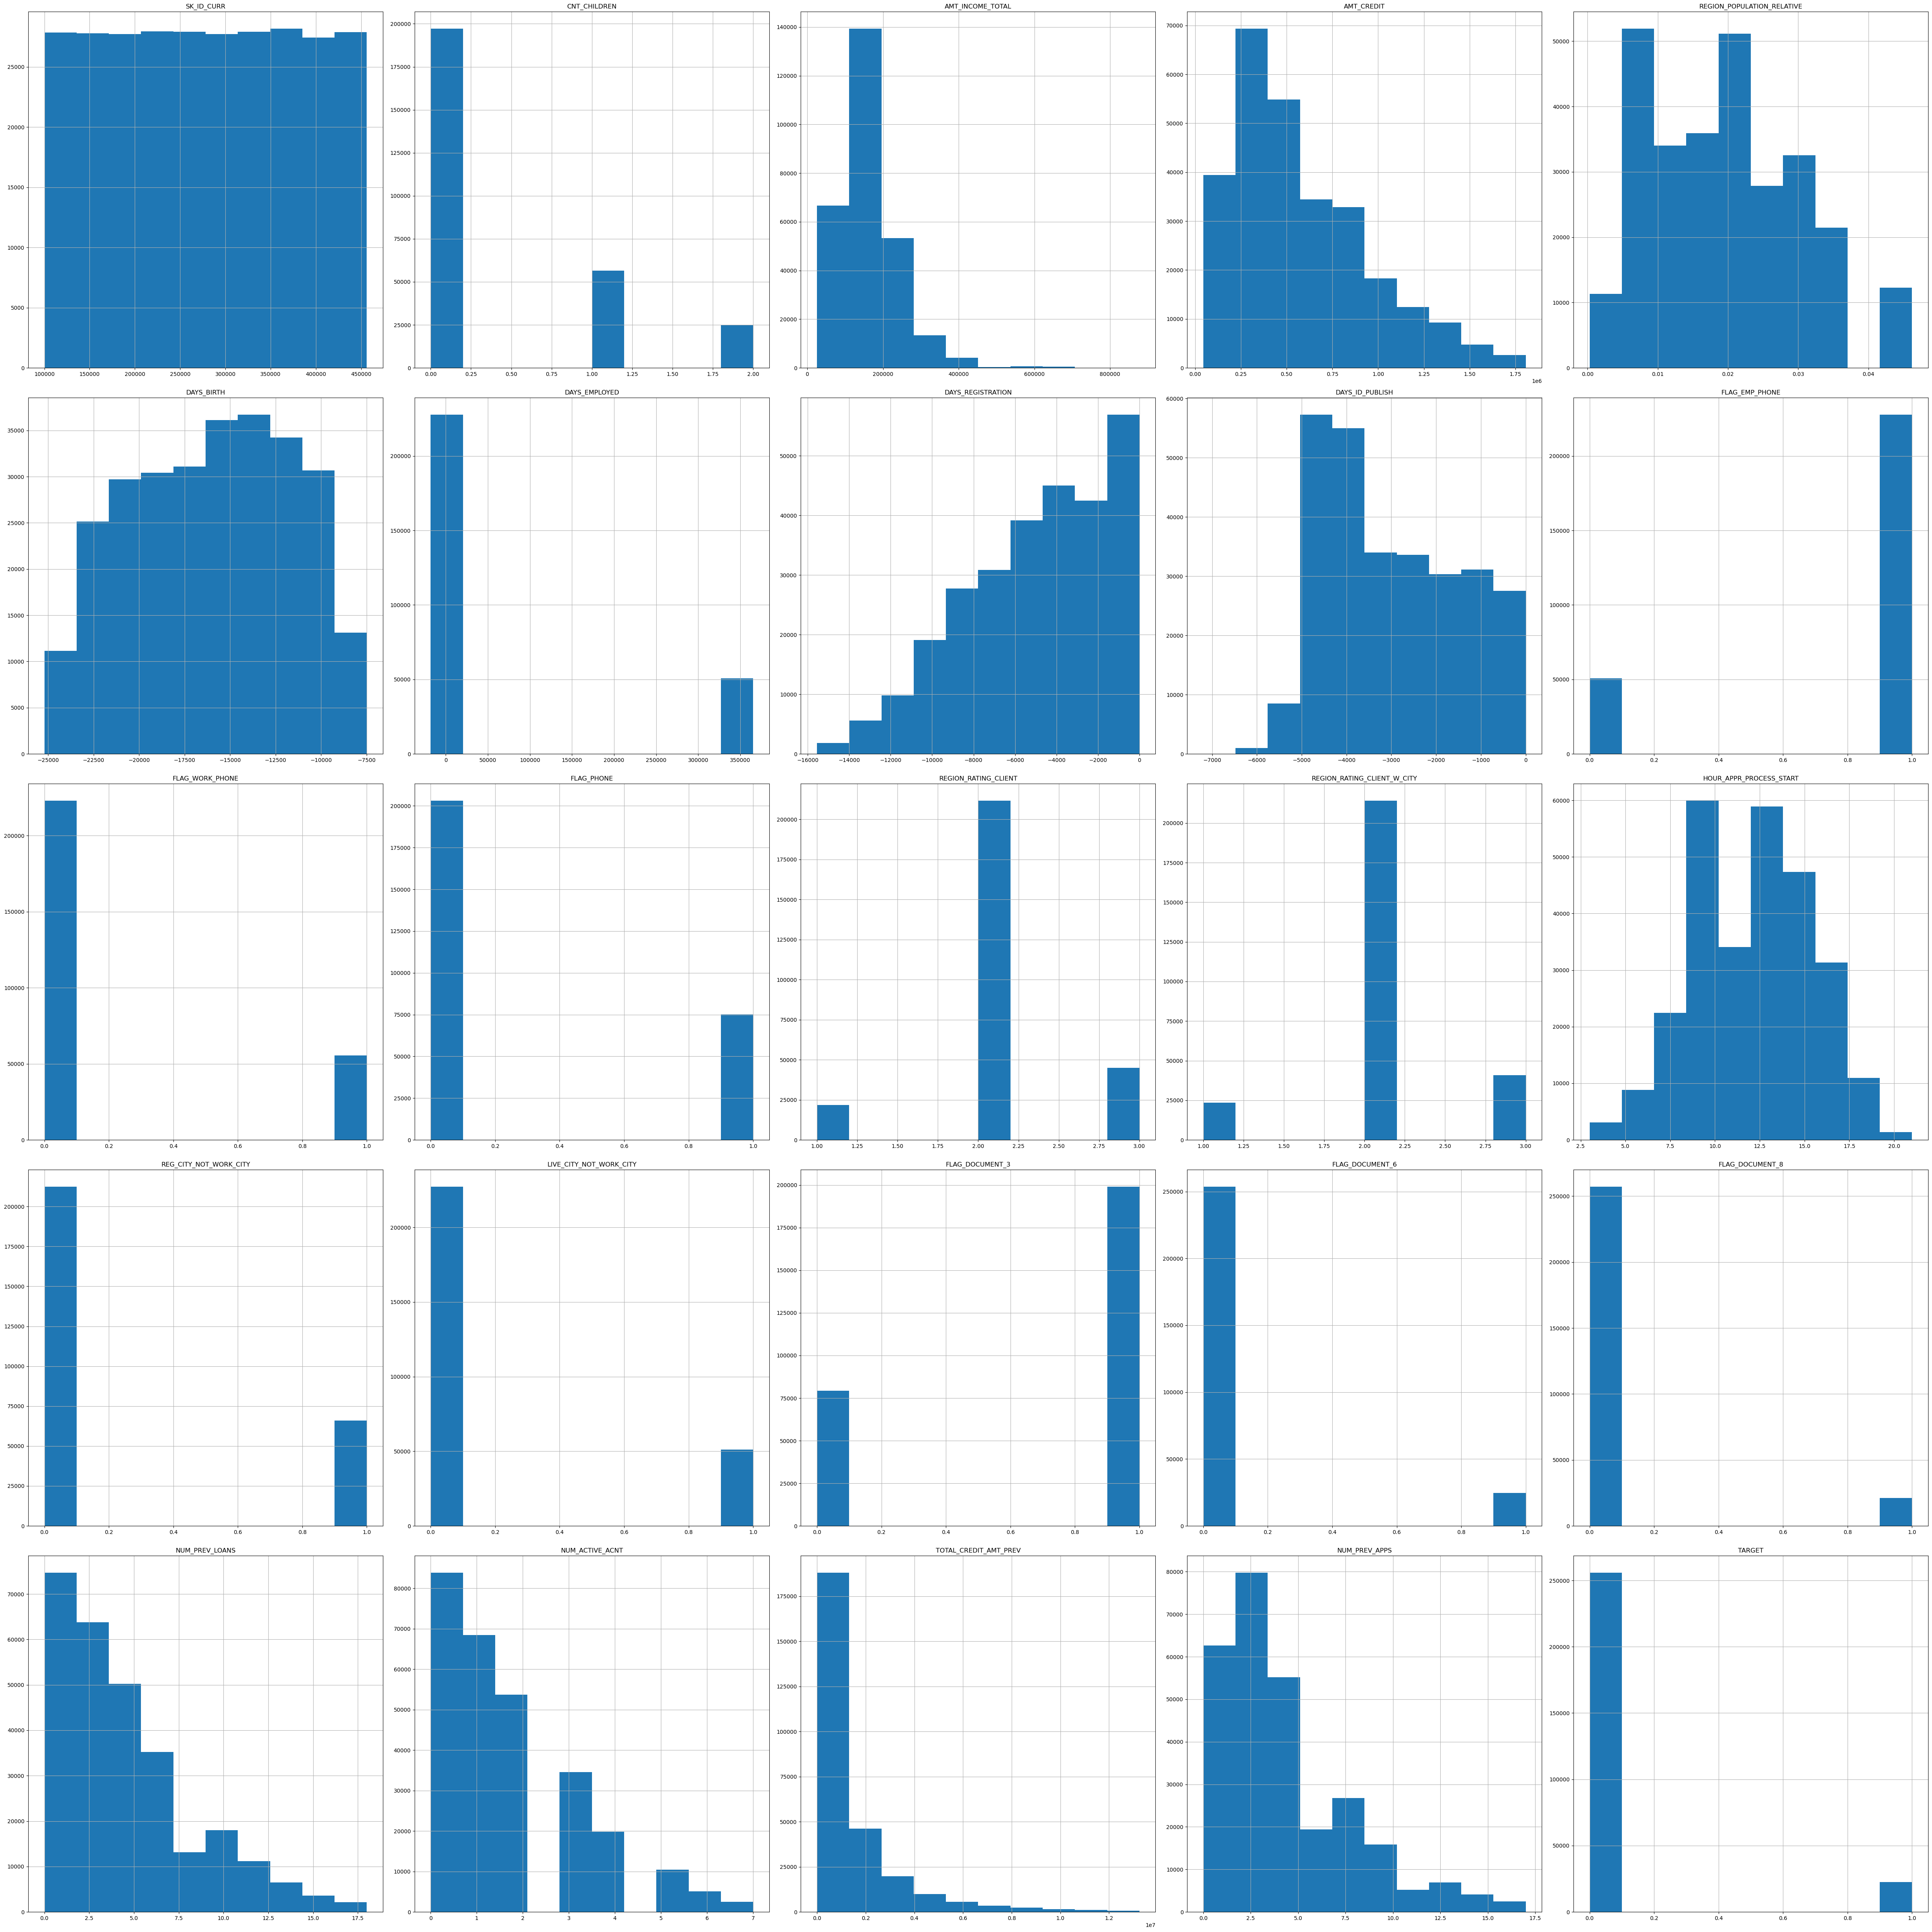

In [44]:
# We first want to look at the historgrams for each of the variables. This will allow us to quickly identify any variables that may have outliers.
data.hist(figsize=(50, 50))
plt.tight_layout()
plt.show()

## Correlation
### Correlation Questions:
What variables are most correlated with the target variable?, Are they possitive or negatively correlated?

In [45]:
correlations = data.corr()['TARGET'].sort_values(ascending=False)

print('Most Negative Correlations:\n', correlations.tail(5))
print('\nMost Positive Correlatios:\n', correlations.head(6))

Most Negative Correlations:
 AMT_CREDIT                   -0.025855
TOTAL_CREDIT_AMT_PREV        -0.026893
REGION_POPULATION_RELATIVE   -0.027332
FLAG_DOCUMENT_6              -0.029841
DAYS_EMPLOYED                -0.047295
Name: TARGET, dtype: float64

Most Positive Correlatios:
 TARGET                         1.000000
DAYS_BIRTH                     0.081411
REGION_RATING_CLIENT_W_CITY    0.054521
DAYS_ID_PUBLISH                0.053775
REGION_RATING_CLIENT           0.052473
REG_CITY_NOT_WORK_CITY         0.051514
Name: TARGET, dtype: float64


From the above information, we can conclude that specific predictors exhibit negative correlations with the TARGET variable. These predictors include HOUR_APPR_PROCESS_START, FLAG_DOCUMENT_6, AMT_CREDIT, REGION_POPULATION_RELATIVE, and DAYS_EMPLOYED. This implies that the values of both the TARGET variable and these predictors tend to change in opposite directions.

On the other hand, some predictors demonstrate negative correlations with the TARGET variable, namely DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_ID_PUBLISH, REG_CITY_NOT_WORK_CITY
This implies that as the values of the TARGET variable increase, the values of these predictors increase. In other words, the TARGET variable and these predictors have the same relationship regarding their changes.

## Categorical Variables
### Categorical Questions:
How many categorical variables are there?, How should we encode the categorical variables?, How many columns will be in the dataset after we encode all the categorical variables?

In [46]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [47]:
# Lets perform one-hot encoding on the categorical variables. This will be usefule for performing logistical regression on the data.
data = pd.get_dummies(data)
data_test = pd.get_dummies(data_test)
print(data.shape)
data_test.shape

(278329, 124)


(48744, 121)

## Results Summary
The final dataset we created for this assignment has 124 variables. The dataset includes categorical variables that have been encoded using one-hot encoding. The final dataset is compiled using three datasets, including the current application dataset, the bureau dataset, and the previous application dataset. Many of the variables in these datasets had missing values. We simplified the data cleaning process due to the sheer amount of data by removing all variables containing null values. In addition, we removed any binary variable with imbalanced data greater than with a 92% 8% split. The target variable is also binary and has a 92% 8% split imbalance. It would be good to look into oversampling techniques to train the model for future model building.
Additionally, it was looked into to try and remove outliers from the data. We showed an example of such outliers regarding DAYS_EMPLOYED, having values above 1000 years. In the end, we found positive and negative variables correlating with the target variable. With further analysis, we hope to see if these variables impact the model's ability to categorize the target variable correctly. Moving forward, one model approach we want to consider is logistic regression and other classifier models.

In [108]:
#KNN model
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd

In [109]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [111]:
# Fitting the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
# Prediction on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculating accuracy and AUC
accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

In [113]:
accuracy = accuracy_score(y_test, y_pred_knn)
print('AUC', auc_knn)
print('Accuracy:', accuracy)

AUC 0.518542260620628
Accuracy: 0.9126935651923975


In [114]:
# Calculating other evaluation metrics:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Printing the evaluation metrics:
print("Prediction Accuracy:", accuracy)
print("AUC Score:", auc_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Printing the predicted labels:
print("Predicted Labels:", y_pred_knn)

Prediction Accuracy: 0.9126935651923975
AUC Score: 0.518542260620628
Precision: 0.09210526315789473
Recall: 0.007147024504084014
F1 Score: 0.013264753654574989
Predicted Labels: [0. 0. 0. ... 0. 0. 0.]


In [115]:
#changing the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

accuracy = accuracy_score(y_test, y_pred_knn)
print('AUC', auc_knn)
print('Accuracy:', accuracy)

AUC 0.5080053071834316
Accuracy: 0.9119869699038312


In [116]:
# Calculating other evaluation metrics:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Printing the evaluation metrics:
print("Prediction Accuracy:", accuracy)
print("AUC Score:", auc_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Printing the predicted labels:
print("Predicted Labels:", y_pred_knn)

Prediction Accuracy: 0.9119869699038312
AUC Score: 0.5080053071834316
Precision: 0.10305958132045089
Recall: 0.009334889148191364
F1 Score: 0.017119165440684765
Predicted Labels: [0. 0. 0. ... 0. 0. 0.]


In [120]:
#changing the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

accuracy = accuracy_score(y_test, y_pred_knn)
print('AUC', auc_knn)
print('Accuracy:', accuracy)


AUC 0.5226325557334418
Accuracy: 0.9178073988910047


In [121]:
# Calculating other evaluation metrics:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Printing the evaluation metrics:
print("Prediction Accuracy:", accuracy)
print("AUC Score:", auc_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Printing the predicted labels:
print("Predicted Labels:", y_pred_knn)


Prediction Accuracy: 0.9178073988910047
AUC Score: 0.5226325557334418
Precision: 0.18181818181818182
Recall: 0.00029171528588098014
F1 Score: 0.000582495995340032
Predicted Labels: [0. 0. 0. ... 0. 0. 0.]


## For this dataset, the accuracy is increased to 91.7 when we increase the nearest neighbours to 10. But there isn't a very significant difference when we change the nearest neighbours values from the above analysis.

In [ ]:
#KNN model performace when performed sampling on data

In [123]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [124]:
##For resampling the data
majority = data[data['TARGET'] == 0]
minority = data[data['TARGET'] == 1]

majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

data_final = pd.concat([majority_downsampled, minority])

X_final = data_final.drop('TARGET', axis=1)
y_final = data_final['TARGET']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=123)

In [126]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [127]:
# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy and AUC
accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

In [128]:
accuracy = accuracy_score(y_test, y_pred_knn)
print('AUC', auc_knn)
print('Accuracy:', accuracy)

AUC 0.5375148834416597
Accuracy: 0.5286369690691135


In [105]:
# Calculate other evaluation metrics
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics
print("Prediction Accuracy:", accuracy)
print("AUC Score:", auc_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the predicted labels
print("Predicted Labels:", y_pred_knn)

Prediction Accuracy: 0.5286369690691135
AUC Score: 0.5375148834416597
Precision: 0.5371587093006278
Recall: 0.5348161069922954
F1 Score: 0.5359848484848485
Predicted Labels: [0. 0. 1. ... 1. 1. 1.]


## when we compare the performance models without sampling the data and with sampling the data, we can see that the accuracy is less for sampled model which is around 52%

In [129]:
#changing the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

accuracy = accuracy_score(y_test, y_pred_knn)
print('AUC', auc_knn)
print('Accuracy:', accuracy)

AUC 0.5238846470144438
Accuracy: 0.5117655764392481


In [130]:
# Calculating other evaluation metrics:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Printing the evaluation metrics:
print("Prediction Accuracy:", accuracy)
print("AUC Score:", auc_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Printing the predicted labels:
print("Predicted Labels:", y_pred_knn)

Prediction Accuracy: 0.5117655764392481
AUC Score: 0.5238846470144438
Precision: 0.5395886165116934
Recall: 0.27838348597179824
F1 Score: 0.36728039892596853
Predicted Labels: [0. 0. 1. ... 0. 1. 0.]


In [131]:
#changing the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

accuracy = accuracy_score(y_test, y_pred_knn)
print('AUC', auc_knn)
print('Accuracy:', accuracy)

AUC 0.5492921950569173
Accuracy: 0.5319668491934291


In [132]:
# Calculating other evaluation metrics:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Printing the evaluation metrics:
print("Prediction Accuracy:", accuracy)
print("AUC Score:", auc_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Printing the predicted labels:
print("Predicted Labels:", y_pred_knn)

Prediction Accuracy: 0.5319668491934291
AUC Score: 0.5492921950569173
Precision: 0.5510693215339233
Recall: 0.43451083006250907
F1 Score: 0.48589774851662193
Predicted Labels: [0. 0. 1. ... 1. 1. 0.]


## From the above analysis, we can say that for n=10, the accuracy has improved i.e., 53.1% when compared to n=2 and n=5